In [22]:
import pickle
import numpy as np 
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams["image.origin"] = 'lower'

# Data preparation
## Input: 
- E seed
- eta,phi,z seed
- E cluster
- delta_eta,delta_phi,

Filter only windows with the calo

In [2]:
data_0 = pickle.load(open("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/four_gamma_withPU/clusters_data.pkl", "rb"))
data_1 = pickle.load(open("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/four_gamma_withPU/clusters_data_1.pkl", "rb"))
data_2 = pickle.load(open("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/four_gamma_withPU/clusters_data_2.pkl", "rb"))
data_3 = pickle.load(open("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/four_gamma_withPU/clusters_data_3.pkl", "rb"))
# Take only non-seed
data_0 = data_0[data_0.is_calo & (data_0.is_seed == False)]
data_1 = data_1[data_1.is_calo & (data_1.is_seed == False)]
data_2 = data_2[data_2.is_calo & (data_2.is_seed == False)]
data_3 = data_3[data_3.is_calo & (data_3.is_seed == False)]
data  = pd.concat([data_0, data_1, data_2, data_3], ignore_index=True)

In [3]:
data

,cluster_deta,cluster_dphi,cluster_iz,en_cluster,en_seed,en_true,in_scluster,index,is_calo,is_seed,max_dr_cluster,max_en_cluster,nclusters,seed_eta,seed_iz,seed_phi,window_index
0,0.012077,-1.376191,1,9.733228,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
1,-0.051490,0.298836,1,7.639978,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
2,-0.256218,2.395605,1,5.842661,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
3,-0.523914,2.345462,1,5.739902,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
4,-0.113678,1.065758,1,4.910976,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
5,-0.257741,0.827046,1,4.739806,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
6,-0.513769,2.745318,1,4.283613,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
7,-0.653608,0.000223,1,3.063133,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
8,-0.367775,0.543580,1,2.832787,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0
9,-0.588577,0.070433,1,2.624873,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0


In [34]:
outsc = data[data.in_scluster == False]
insc =  data[data.in_scluster == True]

(array([ 101.,   95.,  198.,  245.,  305.,  473.,  449.,  490.,  507.,
         716.,  733., 1385., 1026., 1695., 1461., 1254.,  821.,  675.,
         606.,  525.,  479.,  505.,  369.,  312.,  291.,  336.,  385.,
         341.,  470.,  492.,  534.,  550.,  721.,  816., 1269., 1451.,
        1552., 1109., 1377.,  834.,  641.,  504.,  534.,  550.,  495.,
         375.,  213.,  167.,  105.,   61.]),
 array([-2.93911028, -2.82173965, -2.70436901, -2.58699838, -2.46962774,
        -2.35225711, -2.23488647, -2.11751584, -2.00014521, -1.88277457,
        -1.76540394, -1.6480333 , -1.53066267, -1.41329204, -1.2959214 ,
        -1.17855077, -1.06118013, -0.9438095 , -0.82643887, -0.70906823,
        -0.5916976 , -0.47432696, -0.35695633, -0.2395857 , -0.12221506,
        -0.00484443,  0.11252621,  0.22989684,  0.34726748,  0.46463811,
         0.58200874,  0.69937938,  0.81675001,  0.93412065,  1.05149128,
         1.16886191,  1.28623255,  1.40360318,  1.52097382,  1.63834445,
         1.75571

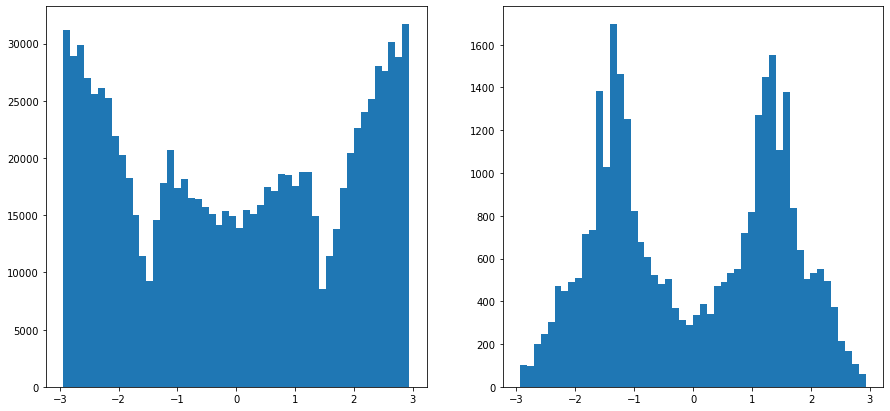

In [36]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].hist(outsc.seed_eta, bins=50)
ax[1].hist(insc.seed_eta, bins= 50)

(array([ 129.,  524.,  806.,  949.,  966., 1036., 1000., 1028.,  957.,
         785.,  930.,  890.,  917.,  773.,  760.,  583.,  737.,  714.,
         672.,  633.,  709.,  621.,  647.,  712.,  660.,  720.,  606.,
         631.,  624.,  657.,  638.,  564.,  707.,  489.,  519.,  536.,
         493.,  452.,  597.,  527.,  563.,  510.,  473.,  432.,  478.,
         330.,  372.,  305.,  176.,   61.]),
 array([1.12220218e-03, 1.99241249e+00, 3.98370278e+00, 5.97499306e+00,
        7.96628335e+00, 9.95757364e+00, 1.19488639e+01, 1.39401542e+01,
        1.59314445e+01, 1.79227348e+01, 1.99140251e+01, 2.19053154e+01,
        2.38966057e+01, 2.58878959e+01, 2.78791862e+01, 2.98704765e+01,
        3.18617668e+01, 3.38530571e+01, 3.58443474e+01, 3.78356377e+01,
        3.98269280e+01, 4.18182182e+01, 4.38095085e+01, 4.58007988e+01,
        4.77920891e+01, 4.97833794e+01, 5.17746697e+01, 5.37659600e+01,
        5.57572503e+01, 5.77485405e+01, 5.97398308e+01, 6.17311211e+01,
        6.37224114e+01, 

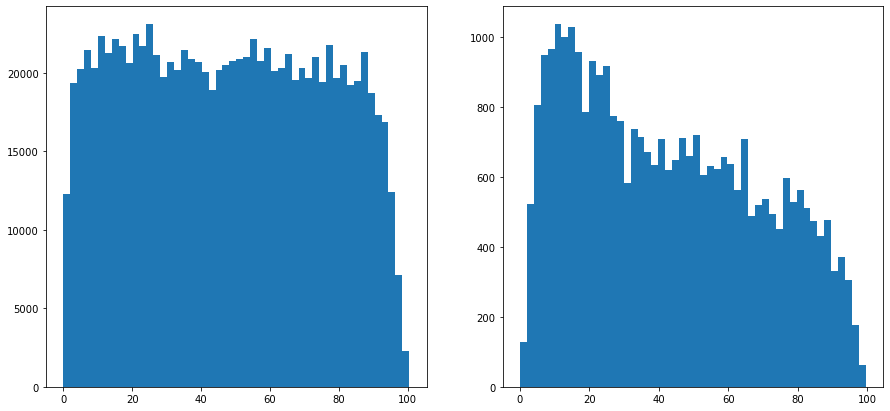

In [41]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].hist(outsc.en_true / np.cosh(outsc.seed_eta), bins=50)
ax[1].hist(insc.en_true / np.cosh(insc.seed_eta), bins= 50)

## Weights by DeltaPhi

In [4]:
data.columns

Index(['cluster_deta', 'cluster_dphi', 'cluster_iz', 'en_cluster', 'en_seed',
       'en_true', 'in_scluster', 'index', 'is_calo', 'is_seed',
       'max_dr_cluster', 'max_en_cluster', 'nclusters', 'seed_eta', 'seed_iz',
       'seed_phi', 'window_index'],
      dtype='object')

In [7]:
cols = ["seed_eta", "seed_phi", "seed_iz","cluster_deta", "cluster_dphi", "en_seed", "en_cluster"]

In [9]:
X = data[ cols ].values
truth = data[["in_scluster", "nclusters"]].values
y = np.array(truth[:,0], dtype=int)
#train_weights = data.train_weight.values

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [225]:
#train_weights = np.abs(X_train[:,4])

In [17]:
from imblearn.keras import balanced_batch_generator
from imblearn.over_sampling import RandomOverSampler
training_generator, steps_per_epoch_train = balanced_batch_generator(X_train, y_train,  batch_size=128, sampler=RandomOverSampler())
validation_generator, steps_per_epoch_val = balanced_batch_generator(X_val, y_val, batch_size=128, sampler=RandomOverSampler())

# Training

In [18]:
# Import all the required Libraries
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras import backend as K

In [19]:
model = Sequential()
model.add(Dense(80, input_dim=7, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

W1210 09:20:20.278223 140681842972480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1210 09:20:20.319353 140681842972480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1210 09:20:20.328336 140681842972480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1210 09:20:20.368535 140681842972480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                4050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 4,741
Trainable params: 4,741
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit_generator(
            training_generator, 
            epochs=15,
            use_multiprocessing=True,
            steps_per_epoch=steps_per_epoch_train, 
            validation_data = validation_generator, 
            validation_steps = steps_per_epoch_val,
            workers = 2
            )

Epoch 1/15


/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


12227/12227 [==============================] - 30s 2ms/step - loss: 0.1196 - acc: 0.9559 - val_loss: 0.0779 - val_acc: 0.9704
Epoch 2/15
12227/12227 [==============================] - 28s 2ms/step - loss: 0.0910 - acc: 0.9674 - val_loss: 0.0759 - val_acc: 0.9724
Epoch 3/15
12227/12227 [==============================] - 32s 3ms/step - loss: 0.0883 - acc: 0.9684 - val_loss: 0.0739 - val_acc: 0.9731
Epoch 4/15
12227/12227 [==============================] - 26s 2ms/step - loss: 0.0873 - acc: 0.9688 - val_loss: 0.0732 - val_acc: 0.9732
Epoch 5/15
12227/12227 [==============================] - 30s 2ms/step - loss: 0.0865 - acc: 0.9690 - val_loss: 0.0734 - val_acc: 0.9726
Epoch 6/15
12227/12227 [==============================] - 28s 2ms/step - loss: 0.0857 - acc: 0.9693 - val_loss: 0.0731 - val_acc: 0.9740
Epoch 7/15
12227/12227 [==============================] - 25s 2ms/step - loss: 0.0861 - acc: 0.9690 - val_loss: 0.0716 - val_acc: 0.9746
Epoch 8/15
12227/12227 [============================

>>> Computing AUC...
AUC score: 0.9967753473925127
>>> Saving ROC curve...


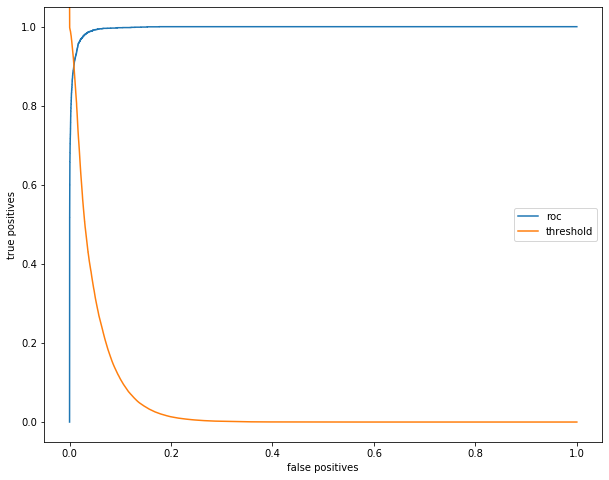

In [23]:
# Evalutation
print(">>> Computing AUC...")

from sklearn.metrics import roc_auc_score, roc_curve

pred = model.predict(X_test,batch_size=2048)
auc = roc_auc_score(y_test, pred)
print("AUC score: " + str(auc))

print(">>> Saving ROC curve...")
fp , tp, th = roc_curve(y_test, pred)
plt.plot(fp, tp, label="roc")
plt.plot(fp, th, label="threshold")
plt.xlabel("false positives")
plt.ylabel("true positives")
plt.ylim(-0.05,1.05)
plt.legend()

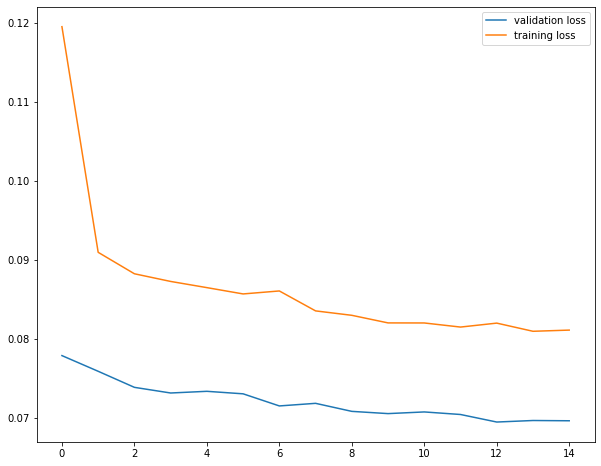

In [24]:
plt.plot(history.epoch, history.history["val_loss"], label="validation loss")
plt.plot(history.epoch, history.history["loss"], label="training loss")
plt.legend()

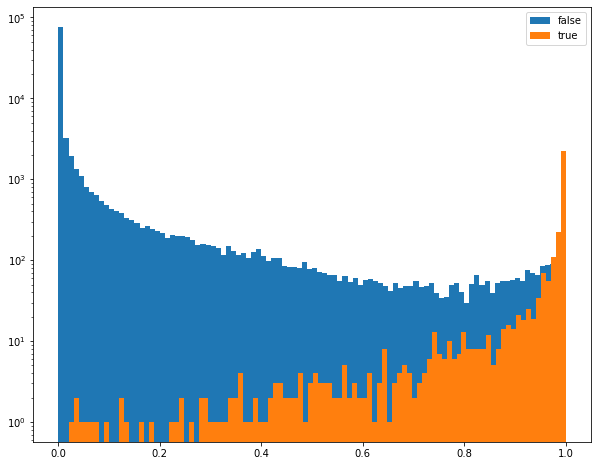

In [25]:
results = model.predict(X_test)
plt.hist(results[y_test==0], bins=100, label="false")
plt.hist(results[y_test==1], bins=100, label="true")
plt.yscale("log")
plt.legend()

# Some plots

In [26]:
data_out = data[data.in_scluster== False]
data_in = data[data.in_scluster == True]
cols = ["seed_eta", "seed_phi", "seed_iz","cluster_deta", "cluster_dphi", "en_seed", "en_cluster"]

In [27]:
data_out["y"] = model.predict(scaler.transform(data_out[cols].values), batch_size=128)
data_in["y"] = model.predict(scaler.transform(data_in[cols].values), batch_size=128)

/usr/local/bin/start_ipykernel.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/bin/start_ipykernel.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
tr = 0.95
data_out_0 = data_out[data_out.y < tr]
data_out_1 = data_out[data_out.y > tr]
data_in_0 = data_in[data_in.y < tr]
data_in_1 = data_in[data_in.y > tr]

In [33]:
data_out_0

,cluster_deta,cluster_dphi,cluster_iz,en_cluster,en_seed,en_true,in_scluster,index,is_calo,is_seed,max_dr_cluster,max_en_cluster,nclusters,seed_eta,seed_iz,seed_phi,window_index,y
0,0.012077,-1.376191,1,9.733228,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,1.788139e-07
1,-0.051490,0.298836,1,7.639978,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,7.195526e-02
2,-0.256218,2.395605,1,5.842661,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,0.000000e+00
3,-0.523914,2.345462,1,5.739902,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,0.000000e+00
4,-0.113678,1.065758,1,4.910976,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,0.000000e+00
5,-0.257741,0.827046,1,4.739806,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,5.960464e-08
6,-0.513769,2.745318,1,4.283613,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,0.000000e+00
7,-0.653608,0.000223,1,3.063133,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,0.000000e+00
8,-0.367775,0.543580,1,2.832787,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,0.000000e+00
9,-0.588577,0.070433,1,2.624873,794.692444,744.106323,False,0,True,False,0.001502,794.692444,1,2.874128,1,-1.248907,0,0.000000e+00


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 1.300e+01, 1.300e+01, 2.200e+01, 3.600e+01,
        4.200e+01, 8.400e+01, 1.100e+02, 2.220e+02, 3.190e+02, 4.660e+02,
        9.130e+02, 1.768e+03, 3.130e+03, 5.439e+03, 3.089e+03, 3.674e+03,
        5.286e+03, 2.981e+03, 1.636e+03, 9.180e+02, 5.050e+02, 3.550e+02,
        1.940e+02, 1.440e+02, 6.700e+01, 5.400e+01, 3.700e+01, 2.300e+01,
        1.700e+01, 1.400e+01, 5.000e+0

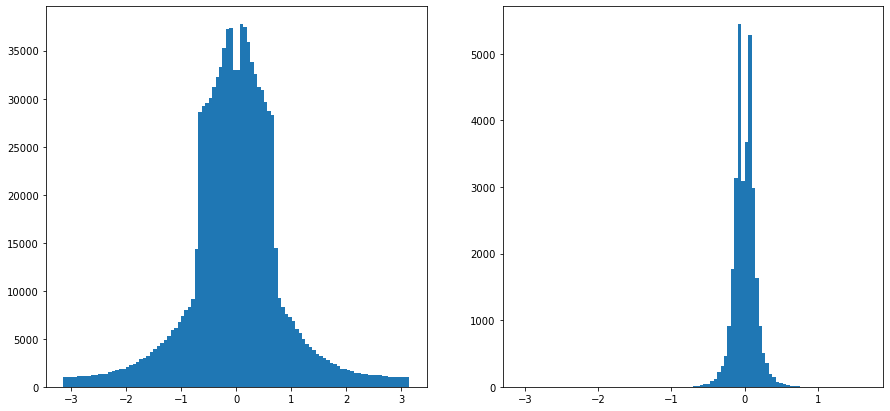

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].hist(data_out.cluster_dphi, bins=100)
ax[1].hist(data_in.cluster_dphi, bins=100)

(-0.6, 0.6)

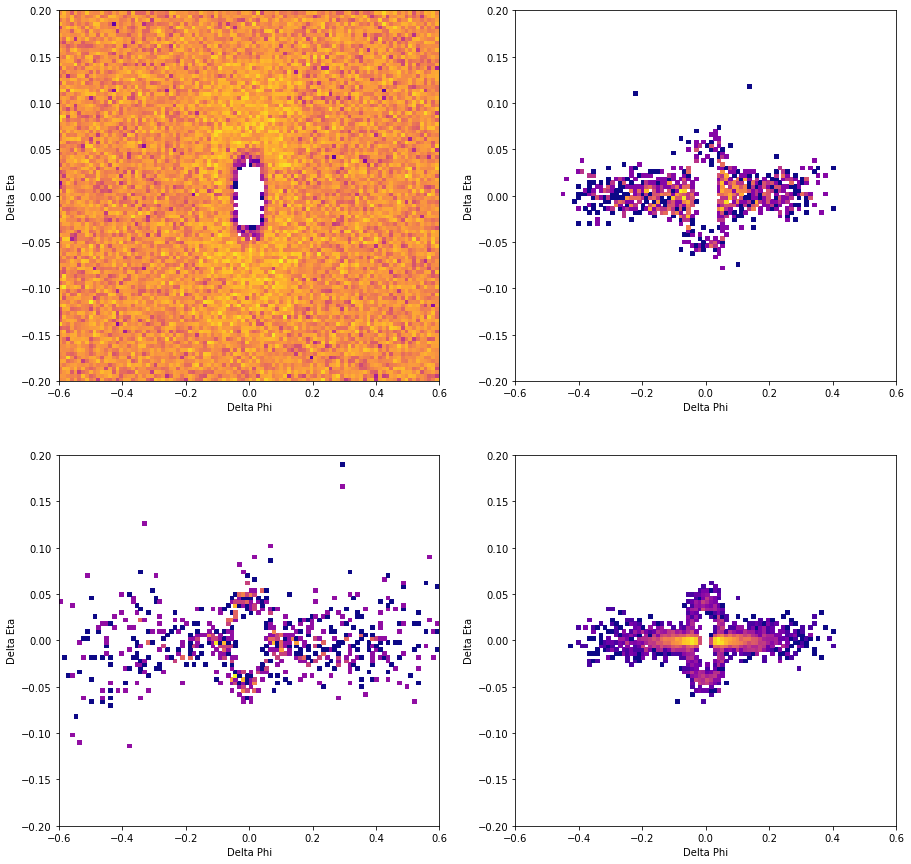

In [30]:
eta_min = 0
eta_max = 1
nbins = 100
fig, ax = plt.subplots(2,2, figsize=(15,15))
ax[0][0].hist2d(data_out_0[ (abs(data_out_0.seed_eta)> eta_min) & (abs(data_out_0.seed_eta)< eta_max) ].cluster_dphi, 
                data_out_0[ (abs(data_out_0.seed_eta)> eta_min) & (abs(data_out_0.seed_eta)< eta_max) ].cluster_deta,
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[0][1].hist2d(data_out_1[ (abs(data_out_1.seed_eta)> eta_min) & (abs(data_out_1.seed_eta)< eta_max) ].cluster_dphi, 
                data_out_1[ (abs(data_out_1.seed_eta)> eta_min) & (abs(data_out_1.seed_eta)< eta_max) ].cluster_deta,  
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[1][0].hist2d(data_in_0[ (abs(data_in_0.seed_eta)> eta_min) & (abs(data_in_0.seed_eta)< eta_max) ].cluster_dphi, 
                data_in_0[ (abs(data_in_0.seed_eta)> eta_min) & (abs(data_in_0.seed_eta)< eta_max) ].cluster_deta,  
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[1][1].hist2d(data_in_1[ (abs(data_in_1.seed_eta)> eta_min) & (abs(data_in_1.seed_eta)< eta_max) ].cluster_dphi, 
                data_in_1[ (abs(data_in_1.seed_eta)> eta_min) & (abs(data_in_1.seed_eta)< eta_max) ].cluster_deta,   
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[0][0].set_ylabel("Delta Eta")
ax[0][0].set_xlabel("Delta Phi")
ax[1][0].set_ylabel("Delta Eta")
ax[1][0].set_xlabel("Delta Phi")
ax[0][1].set_ylabel("Delta Eta")
ax[0][1].set_xlabel("Delta Phi")
ax[1][1].set_ylabel("Delta Eta")
ax[1][1].set_xlabel("Delta Phi")

ax[1][0].set_ylim(-0.2, 0.2)
ax[1][0].set_xlim(-0.6,0.6)
ax[0][0].set_ylim(-0.2, 0.2)
ax[0][0].set_xlim(-0.6,0.6)
ax[1][1].set_ylim(-0.2, 0.2)
ax[1][1].set_xlim(-0.6,0.6)
ax[0][1].set_ylim(-0.2, 0.2)
ax[0][1].set_xlim(-0.6,0.6)

(-0.6, 0.6)

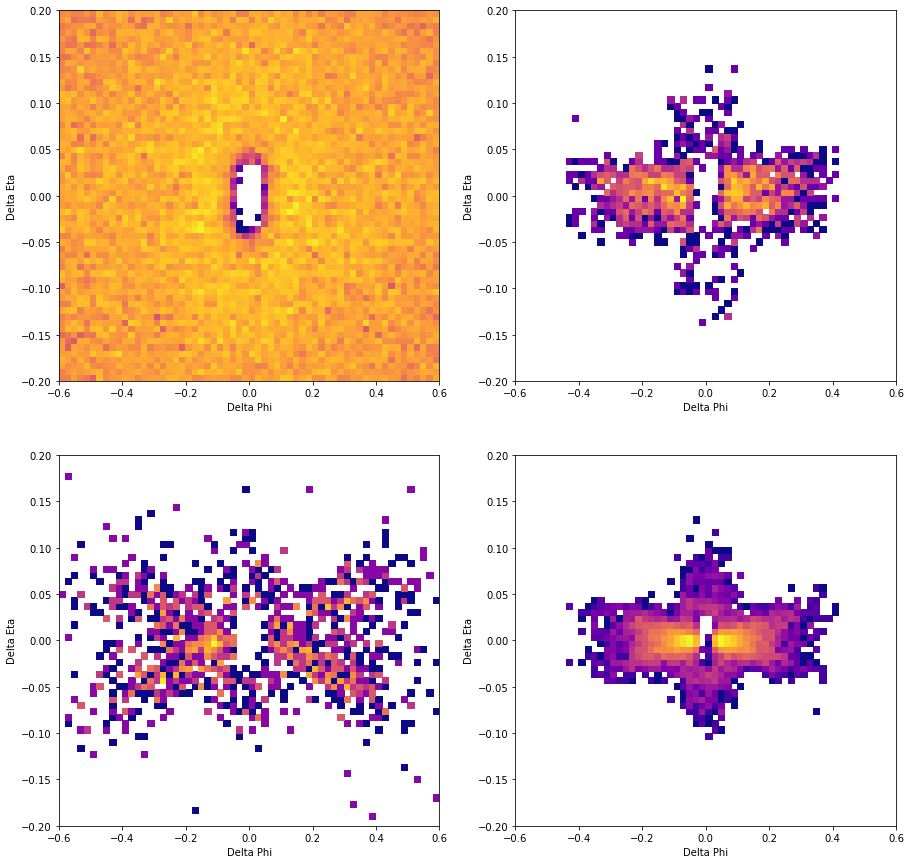

In [31]:
eta_min = 1
eta_max = 2
nbins = 60
fig, ax = plt.subplots(2,2, figsize=(15,15))
ax[0][0].hist2d(data_out_0[ (abs(data_out_0.seed_eta)> eta_min) & (abs(data_out_0.seed_eta)< eta_max) ].cluster_dphi, 
                data_out_0[ (abs(data_out_0.seed_eta)> eta_min) & (abs(data_out_0.seed_eta)< eta_max) ].cluster_deta,
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[0][1].hist2d(data_out_1[ (abs(data_out_1.seed_eta)> eta_min) & (abs(data_out_1.seed_eta)< eta_max) ].cluster_dphi, 
                data_out_1[ (abs(data_out_1.seed_eta)> eta_min) & (abs(data_out_1.seed_eta)< eta_max) ].cluster_deta,  
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[1][0].hist2d(data_in_0[ (abs(data_in_0.seed_eta)> eta_min) & (abs(data_in_0.seed_eta)< eta_max) ].cluster_dphi, 
                data_in_0[ (abs(data_in_0.seed_eta)> eta_min) & (abs(data_in_0.seed_eta)< eta_max) ].cluster_deta,  
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[1][1].hist2d(data_in_1[ (abs(data_in_1.seed_eta)> eta_min) & (abs(data_in_1.seed_eta)< eta_max) ].cluster_dphi, 
                data_in_1[ (abs(data_in_1.seed_eta)> eta_min) & (abs(data_in_1.seed_eta)< eta_max) ].cluster_deta,   
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[0][0].set_ylabel("Delta Eta")
ax[0][0].set_xlabel("Delta Phi")
ax[1][0].set_ylabel("Delta Eta")
ax[1][0].set_xlabel("Delta Phi")
ax[0][1].set_ylabel("Delta Eta")
ax[0][1].set_xlabel("Delta Phi")
ax[1][1].set_ylabel("Delta Eta")
ax[1][1].set_xlabel("Delta Phi")

ax[1][0].set_ylim(-0.2, 0.2)
ax[1][0].set_xlim(-0.6,0.6)
ax[0][0].set_ylim(-0.2, 0.2)
ax[0][0].set_xlim(-0.6,0.6)
ax[1][1].set_ylim(-0.2, 0.2)
ax[1][1].set_xlim(-0.6,0.6)
ax[0][1].set_ylim(-0.2, 0.2)
ax[0][1].set_xlim(-0.6,0.6)

(-0.6, 0.6)

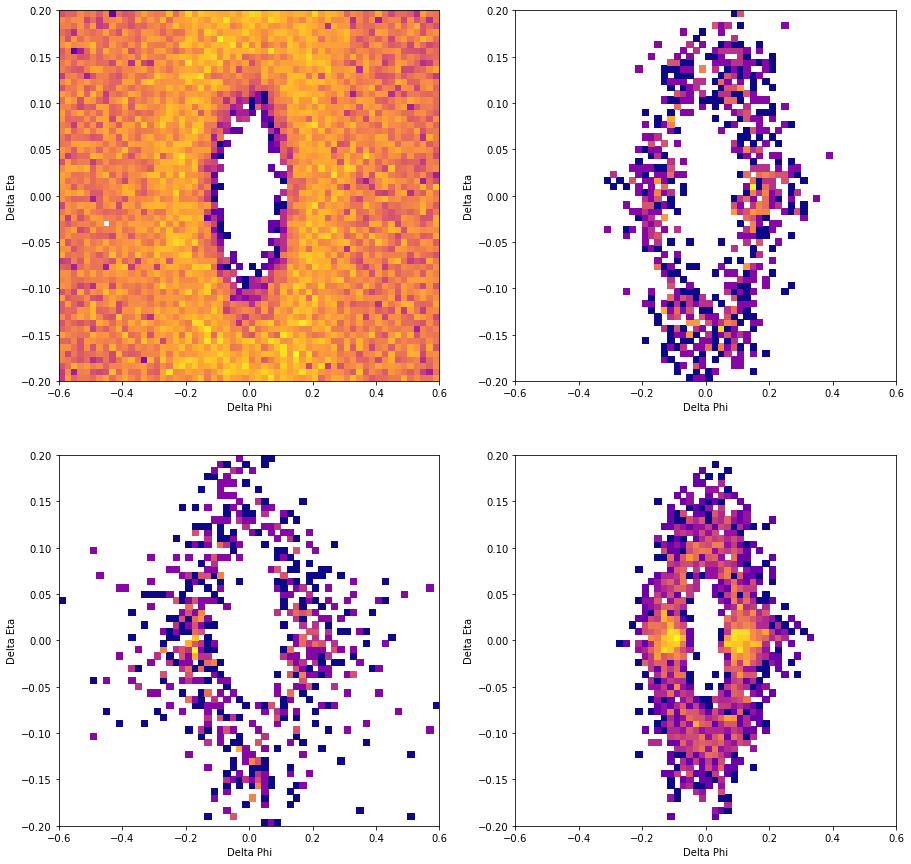

In [32]:
eta_min = 2
eta_max = 3
nbins = 60
fig, ax = plt.subplots(2,2, figsize=(15,15))
ax[0][0].hist2d(data_out_0[ (abs(data_out_0.seed_eta)> eta_min) & (abs(data_out_0.seed_eta)< eta_max) ].cluster_dphi, 
                data_out_0[ (abs(data_out_0.seed_eta)> eta_min) & (abs(data_out_0.seed_eta)< eta_max) ].cluster_deta,
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[0][1].hist2d(data_out_1[ (abs(data_out_1.seed_eta)> eta_min) & (abs(data_out_1.seed_eta)< eta_max) ].cluster_dphi, 
                data_out_1[ (abs(data_out_1.seed_eta)> eta_min) & (abs(data_out_1.seed_eta)< eta_max) ].cluster_deta,  
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[1][0].hist2d(data_in_0[ (abs(data_in_0.seed_eta)> eta_min) & (abs(data_in_0.seed_eta)< eta_max) ].cluster_dphi, 
                data_in_0[ (abs(data_in_0.seed_eta)> eta_min) & (abs(data_in_0.seed_eta)< eta_max) ].cluster_deta,  
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[1][1].hist2d(data_in_1[ (abs(data_in_1.seed_eta)> eta_min) & (abs(data_in_1.seed_eta)< eta_max) ].cluster_dphi, 
                data_in_1[ (abs(data_in_1.seed_eta)> eta_min) & (abs(data_in_1.seed_eta)< eta_max) ].cluster_deta,   
                density=True, bins=(nbins,nbins), range=((-0.6,0.6),(-0.2,0.2)), cmap="plasma", norm=colors.LogNorm())
ax[0][0].set_ylabel("Delta Eta")
ax[0][0].set_xlabel("Delta Phi")
ax[1][0].set_ylabel("Delta Eta")
ax[1][0].set_xlabel("Delta Phi")
ax[0][1].set_ylabel("Delta Eta")
ax[0][1].set_xlabel("Delta Phi")
ax[1][1].set_ylabel("Delta Eta")
ax[1][1].set_xlabel("Delta Phi")

ax[1][0].set_ylim(-0.2, 0.2)
ax[1][0].set_xlim(-0.6,0.6)
ax[0][0].set_ylim(-0.2, 0.2)
ax[0][0].set_xlim(-0.6,0.6)
ax[1][1].set_ylim(-0.2, 0.2)
ax[1][1].set_xlim(-0.6,0.6)
ax[0][1].set_ylim(-0.2, 0.2)
ax[0][1].set_xlim(-0.6,0.6)

model.save("models/model1.hd5")